## Importing libraries
_____

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Loading Model libraries
import sys
!{sys.executable} -m pip install xgboost

from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from lightgbm import LGBMClassifier
from scipy.special import erfc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,accuracy_score,classification_report,confusion_matrix , recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, log_loss

from keras.layers import Input, Dense
from keras.models import Model

np.random.seed(2017)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Reading Files
_____

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading the reduced train dataset
train_df1 = pd.read_csv("/content/drive/MyDrive/GROUP DISCUSSIONS/4th Year/4.1/CSC 418 Emerging Technologies Bootcamps/CSC 418 : Data Science /santander_prediction/data/reduced_data/reduced_train.csv")
print(f'The shape of the dataset is: {train_df1.shape}')
train_df1.head()

The shape of the dataset is: (4459, 202)


,ID,target,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_190,feature_191,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199
0,000d6aaf2,38000000.0,0.000000,0.000000,0.0,0.0,0.000000,0.023244,0.003243,0.003947,...,0.0,0.013147,0.0,0.004468,0.004883,0.000732,0.0,0.0,0.022948,0.000000
1,000fbd867,600000.0,0.000000,0.000000,0.0,0.0,0.000000,0.027158,0.006303,0.012587,...,0.0,0.022205,0.0,0.011720,0.006394,0.006632,0.0,0.0,0.028052,0.000000
2,0027d6b71,10000000.0,0.001236,0.001278,0.0,0.0,0.000404,0.005686,0.000667,0.001382,...,0.0,0.004547,0.0,0.000000,0.001826,0.001589,0.0,0.0,0.006595,0.000000
3,0028cbf45,2000000.0,0.000000,0.000000,0.0,0.0,0.000000,0.008072,0.003348,0.002702,...,0.0,0.007250,0.0,0.004271,0.004603,0.001866,0.0,0.0,0.008228,0.000093
4,002a68644,14400000.0,0.000000,0.000000,0.0,0.0,0.000034,0.007285,0.000000,0.000000,...,0.0,0.008125,0.0,0.002605,0.006288,0.001265,0.0,0.0,0.011055,0.000000


In [ ]:
# Reading the reduced test dataset
test_df1 = pd.read_csv("/content/drive/MyDrive/GROUP DISCUSSIONS/4th Year/4.1/CSC 418 Emerging Technologies Bootcamps/CSC 418 : Data Science /santander_prediction/data/reduced_data/reduced_test.csv")
print(f'The shape of the dataset is: {test_df1.shape}')
test_df1.head()

The shape of the dataset is: (49342, 201)


,ID,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_190,feature_191,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199
0,000137c73,0.186130,0.000000,0.147094,0.0,0.0,0.0,0.0,0.048847,0.0,...,0.011525,0.0,0.000000,0.0,0.0,0.109732,0.0,0.0,0.018892,0.049316
1,00021489f,0.013186,0.000000,0.012339,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.003218,0.0,0.0,0.006124,0.0,0.0,0.004211,0.002379
2,0004d7953,0.021303,0.005912,0.024783,0.0,0.0,0.0,0.0,0.002223,0.0,...,0.000790,0.0,0.000000,0.0,0.0,0.018866,0.0,0.0,0.000000,0.000000
3,00056a333,0.036435,0.008201,0.047549,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.017321,0.0,0.005376,0.0,0.0,0.024234,0.0,0.0,0.022375,0.011881
4,00056d8eb,0.051285,0.000000,0.033322,0.0,0.0,0.0,0.0,0.005830,0.0,...,0.000000,0.0,0.000004,0.0,0.0,0.044620,0.0,0.0,0.000000,0.017417


## DATA UNDERSTANDING 

In [ ]:
# check datatypes
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Columns: 202 entries, ID to feature_199
dtypes: float64(201), object(1)
memory usage: 6.9+ MB


In [ ]:
test_df1.info()

In [ ]:
# describing numerical values
train_df1.describe().T

,count,mean,std,min,25%,50%,75%,max
target,4459.0,5.944923e+06,8.234312e+06,30000.000000,600000.000000,2.260000e+06,8.000000e+06,4.000000e+07
feature_0,4459.0,5.361875e-04,2.076556e-03,0.000000,0.000000,0.000000e+00,0.000000e+00,4.059954e-02
feature_1,4459.0,4.966961e-04,2.076920e-03,0.000000,0.000000,0.000000e+00,6.371759e-05,4.360598e-02
feature_2,4459.0,2.564620e-04,1.633504e-03,0.000000,0.000000,0.000000e+00,0.000000e+00,5.247613e-02
feature_3,4459.0,1.550208e-04,9.039189e-04,0.000000,0.000000,0.000000e+00,0.000000e+00,1.856859e-02
...,...,...,...,...,...,...,...,...
feature_195,4459.0,4.888892e-03,9.091688e-03,0.000000,0.000000,6.023739e-04,5.742149e-03,7.904276e-02
feature_196,4459.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
feature_197,4459.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
feature_198,4459.0,4.357583e-02,4.088541e-02,0.004113,0.009403,3.102401e-02,6.379712e-02,2.405880e-01


In [ ]:
# Categorical Values/Object Values
train_df1.describe(include="O").T

,count,unique,top,freq
ID,4459,4459,000d6aaf2,1


In [ ]:
test_df1.describe().T

,count,mean,std,min,25%,50%,75%,max
feature_0,49342.0,4.604992e-02,0.045908,0.001904,0.013727,0.032553,0.062488,0.545622
feature_1,49342.0,4.124738e-03,0.007799,0.000000,0.000000,0.000995,0.004730,0.119625
feature_2,49342.0,4.168616e-02,0.041757,0.002035,0.012308,0.029351,0.056429,0.490588
feature_3,49342.0,8.228334e-07,0.000067,0.000000,0.000000,0.000000,0.000000,0.008349
feature_4,49342.0,1.050595e-06,0.000077,0.000000,0.000000,0.000000,0.000000,0.010892
...,...,...,...,...,...,...,...,...
feature_195,49342.0,3.083864e-02,0.031161,0.000000,0.009271,0.021501,0.041205,0.362277
feature_196,49342.0,1.839732e-07,0.000020,0.000000,0.000000,0.000000,0.000000,0.003432
feature_197,49342.0,4.216123e-06,0.000162,0.000000,0.000000,0.000000,0.000000,0.020839
feature_198,49342.0,9.720988e-03,0.013712,0.000000,0.000990,0.004974,0.013030,0.266714


In [ ]:
#Categorical Values/Object Values
test_df1.describe(include="O").T

,count,unique,top,freq
ID,49342,49342,000137c73,1


### Checking for nulls and duplicates

In [ ]:
#missing value 
train_df1.isnull().sum().sort_values(ascending=False)

ID             0
target         0
feature_0      0
feature_1      0
feature_2      0
              ..
feature_195    0
feature_196    0
feature_197    0
feature_198    0
feature_199    0
Length: 202, dtype: int64

In [ ]:
#missing value 
test_df1.isnull().sum()

ID             0
feature_0      0
feature_1      0
feature_2      0
feature_3      0
              ..
feature_195    0
feature_196    0
feature_197    0
feature_198    0
feature_199    0
Length: 201, dtype: int64

In [ ]:
#duplicate train data rows  
train_df1.duplicated().sum()

0

In [ ]:
#duplicate test data rows 
test_df1.duplicated().sum()


0

**Observations**: 
1. The train and test dataset is full of zeros 
2. The train and test dataset has 0 missing value 
3. The train and test dataset has 0 duplicate rows

## DATA PREPARATION 

### Dealing with Outliers using Chauvenet's criterion

In [ ]:
train_df1.shape

(4459, 202)

In [ ]:
def chauvenet(array):
    mean = array.mean()           # Mean of incoming array
    stdv = array.std()            # Standard deviation
    N = len(array)                # Length of incoming array
    criterion = 1.0/(2*N)         # Chauvenet's criterion
    d = abs(array-mean)/stdv      # Distance of a value to mean in stdv's
    prob = erfc(d)                # Area normal dist.    
    return prob < criterion       # Use boolean array outside this function

In [ ]:
numerical_features=train_df1.columns[2:] 

<ipython-input-16-d37065819838>:6: RuntimeWarning: invalid value encountered in true_divide
  d = abs(array-mean)/stdv      # Distance of a value to mean in stdv's


Total number of outliers in the train dataset: 15466 (346.85%)


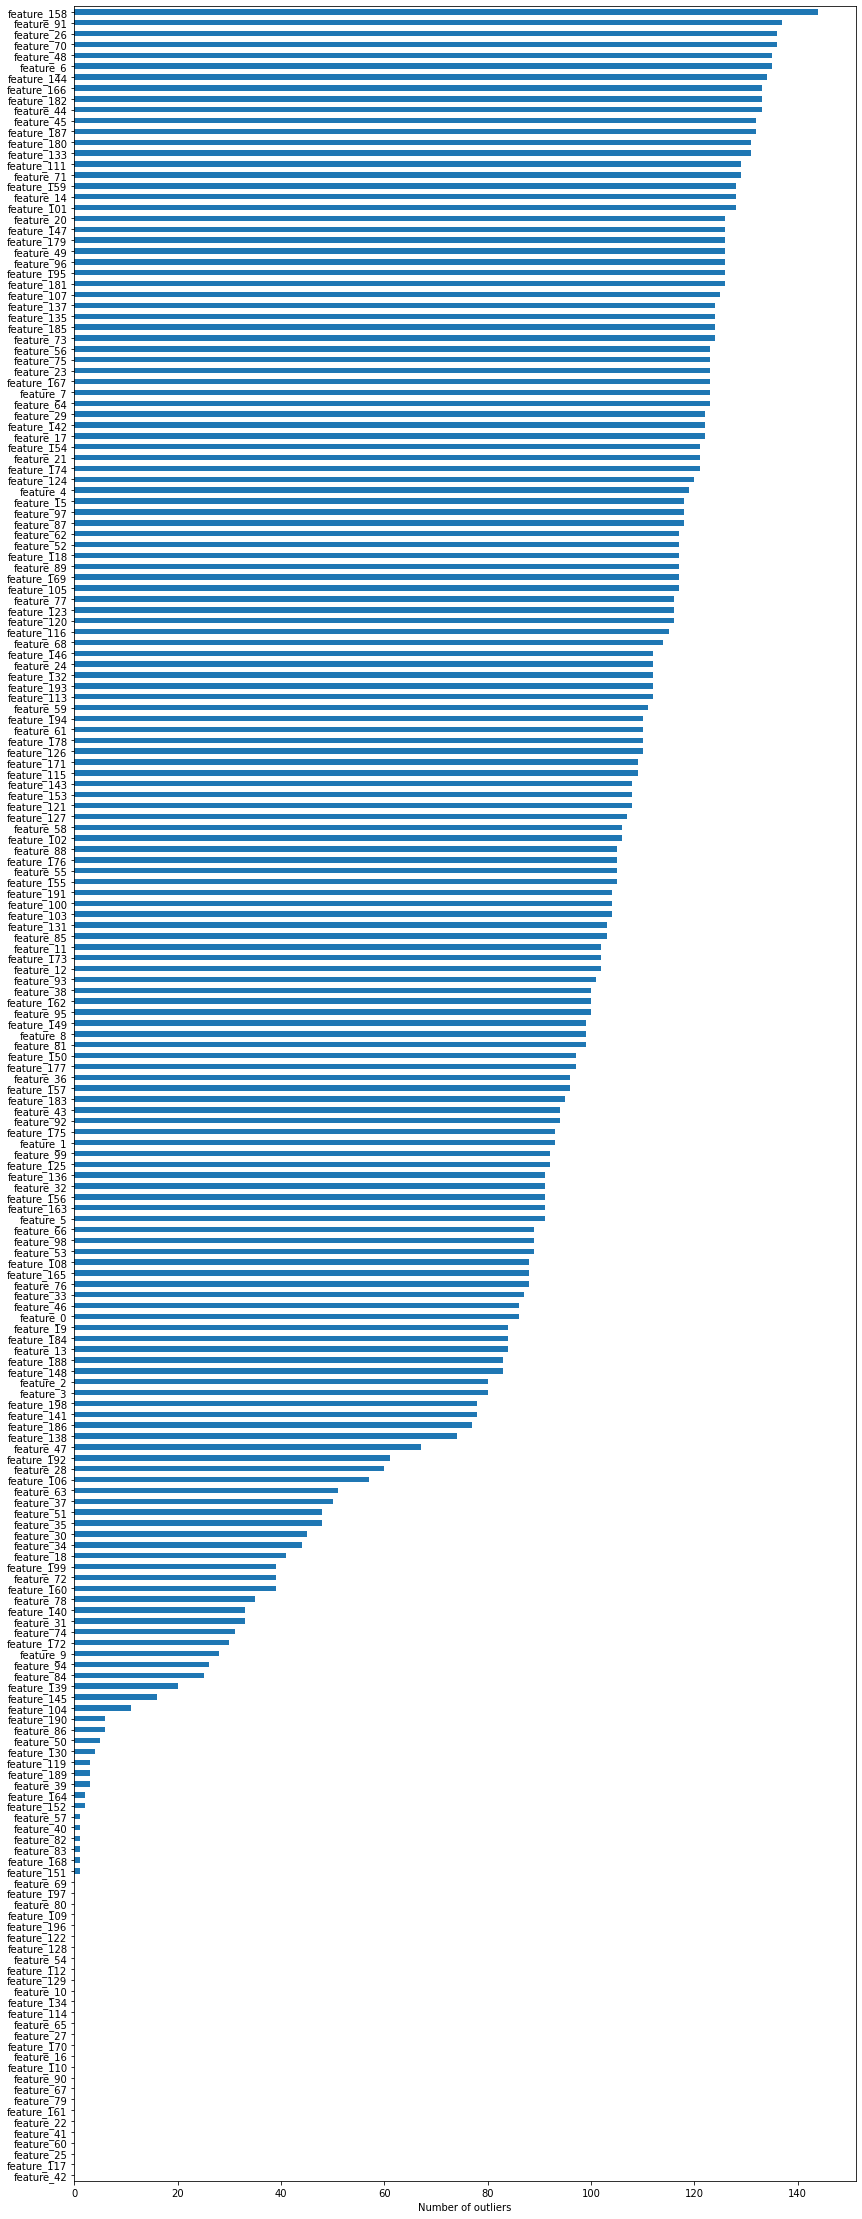

In [ ]:
#checking for outliers in the train dataset using Chauvenet 
train_outliers = dict() 
for col in [col for col in numerical_features]:
    train_outliers[col] = train_df1[chauvenet(train_df1[col].values)].shape[0]
train_outliers = pd.Series(train_outliers)

print('Total number of outliers in the train dataset: {} ({:.2f}%)'.format(sum(train_outliers.values), (sum(train_outliers.values) / train_df1.shape[0]) * 100))
train_outliers.sort_values().plot(figsize=(14, 40), kind='barh').set_xlabel('Number of outliers');

In [ ]:
print('Total number of outliers in the train dataset: {} ({:.2f}%)'.format(sum(train_outliers.values), (sum(train_outliers.values) / train_df1.shape[0]) * 100))

Total number of outliers in the train dataset: 15466 (346.85%)


<ipython-input-16-d37065819838>:6: RuntimeWarning: invalid value encountered in true_divide
  d = abs(array-mean)/stdv      # Distance of a value to mean in stdv's


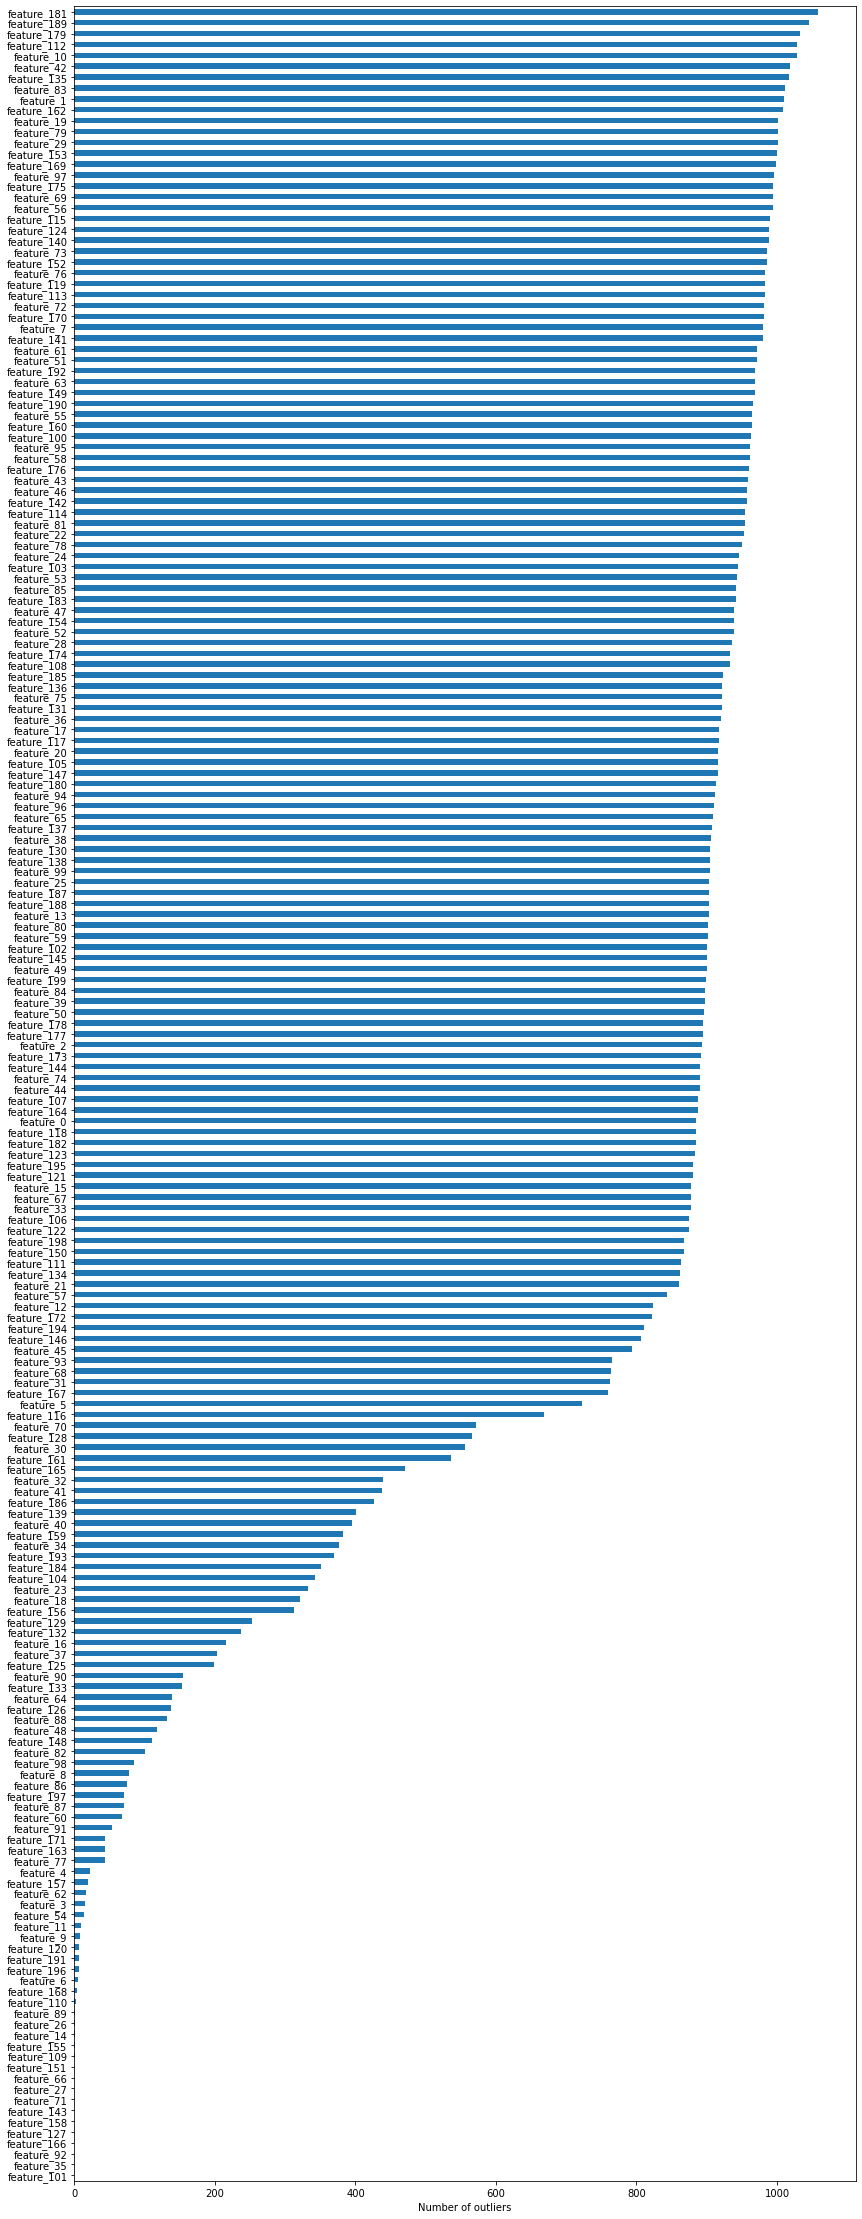

In [ ]:
#checking for outliers in the test dataset using Chauvenet 
test_outliers = dict() 
for col in [col for col in numerical_features]:
    test_outliers[col] = test_df1[chauvenet(test_df1[col].values)].shape[0]
    test_outliers = pd.Series(test_outliers)

test_outliers.sort_values().plot(figsize=(14, 40), kind='barh').set_xlabel('Number of outliers');

In [ ]:
print('Total number of outliers in the test dataset: {} ({:.2f}%)'.format(sum(test_outliers.values), (sum(test_outliers.values) / test_df1.shape[0]) * 100))

Total number of outliers in the train dataset: 130603 (264.69%)


In [ ]:
#remove these outliers in the train and test data
for col in numerical_features:
    train = train_df1.loc[(~chauvenet(train_df1[col].values))]
for col in numerical_features:
    test=test_df1.loc[(~chauvenet(test_df1[col].values))] 

<ipython-input-16-d37065819838>:6: RuntimeWarning: invalid value encountered in true_divide
  d = abs(array-mean)/stdv      # Distance of a value to mean in stdv's


In [ ]:
#shape of train and test data after removal of outliers 
train.shape

(4420, 202)

In [ ]:
train_df1 = train

In [ ]:
test.shape

(48443, 201)

In [ ]:
test_df1 = test

### Dealing with Sparse Data by checking for uniqueness 

Sparse data means that there are many gaps present in the data being recorded. 
As we saw in our train and test data most of the dataset values are zeros 

In [ ]:
#checking columns with one unqiue value in train and test data 
#check unique data in the column 
unique_df = train_df1.nunique().reset_index()
unique_df.columns = ["col_name", "unique_count"]
unique_df = unique_df.sort_values("unique_count")
unique_df


,col_name,unique_count
27,feature_25,1
111,feature_109,1
136,feature_134,1
56,feature_54,1
131,feature_129,1
...,...,...
157,feature_155,4419
158,feature_156,4419
159,feature_157,4419
178,feature_176,4419


In [ ]:
print('Original Shape of Train Dataset {}'.format(train_df1.shape))
print('Original Shape of Test Dataset {}'.format(test_df1.shape))

for col in train_df1.columns:
    column = train_df1[col]
    # Get the count of Zeros in column 
    zero_count = (column == 0).sum()
    # if number of zeros in the column is more than three quater the unique values in the column
    if(zero_count > (3/4 * train_df1.shape[0])):
      # dropping the zero-columns in both the train and test datasets
        train_df1.drop(col, axis = 1, inplace = True)
        test_df1.drop(col, axis = 1, inplace = True)

print('Shape after dropping Constant Columns from Train Dataset {}'.format(train_df1.shape))
print('Shape after dropping Constant Columns from Test Dataset {}'.format(test_df1.shape))

Original Shape of Train Dataset (4420, 202)
Original Shape of Test Dataset (48443, 201)
Shape after dropping Constant Columns from Train Dataset (4420, 110)
Shape after dropping Constant Columns from Test Dataset (48443, 109)


In [ ]:
train_df1.head(10)

,ID,target,feature_1,feature_5,feature_6,feature_7,feature_11,feature_13,feature_14,feature_17,...,feature_182,feature_184,feature_185,feature_186,feature_188,feature_191,feature_193,feature_194,feature_195,feature_198
0,000d6aaf2,38000000.0,0.000000,0.023244,0.003243,0.003947,0.000356,0.016329,0.006848,0.000000,...,0.000038,0.012391,0.002091,0.032239,0.027229,0.013147,0.004468,0.004883,0.000732,0.022948
1,000fbd867,600000.0,0.000000,0.027158,0.006303,0.012587,0.022226,0.032195,0.001762,0.000278,...,0.015104,0.021500,0.000000,0.053344,0.028922,0.022205,0.011720,0.006394,0.006632,0.028052
2,0027d6b71,10000000.0,0.001278,0.005686,0.000667,0.001382,0.002113,0.005705,0.002574,0.000000,...,0.001259,0.003773,0.000988,0.009903,0.007747,0.004547,0.000000,0.001826,0.001589,0.006595
3,0028cbf45,2000000.0,0.000000,0.008072,0.003348,0.002702,0.006162,0.011368,0.001585,0.000000,...,0.000550,0.005262,0.000081,0.012857,0.012310,0.007250,0.004271,0.004603,0.001866,0.008228
4,002a68644,14400000.0,0.000000,0.007285,0.000000,0.000000,0.004529,0.012930,0.001465,0.000000,...,0.002097,0.005864,0.000387,0.015227,0.012457,0.008125,0.002605,0.006288,0.001265,0.011055
5,002dbeb22,2800000.0,0.000000,0.050580,0.000000,0.024301,0.046167,0.074991,0.020580,0.000502,...,0.018356,0.064543,0.000000,0.083834,0.073930,0.044803,0.017575,0.007399,0.027864,0.061858
6,003925ac6,164000.0,0.000000,0.072046,0.002217,0.003566,0.029842,0.101319,0.017479,0.000000,...,0.014891,0.046021,0.008696,0.135404,0.076195,0.046351,0.008715,0.024486,0.000000,0.079220
7,003eb0261,600000.0,0.000526,0.023586,0.002998,0.008590,0.016179,0.033057,0.005292,0.000000,...,0.010496,0.013965,0.005425,0.054069,0.050039,0.025854,0.005103,0.022180,0.006757,0.037431
8,004b92275,979000.0,0.000000,0.009030,0.003089,0.001107,0.005170,0.010540,0.003407,0.000000,...,0.000000,0.006791,0.001069,0.013014,0.010761,0.002668,0.001955,0.001382,0.000000,0.008938
9,0067b4fef,460000.0,0.002061,0.006786,0.000375,0.001266,0.002033,0.006264,0.001998,0.000000,...,0.000000,0.002923,0.000580,0.008861,0.008293,0.004808,0.000759,0.001755,0.000000,0.006625


In [ ]:
test_df1.head(10)

,ID,feature_1,feature_5,feature_6,feature_7,feature_11,feature_13,feature_14,feature_17,feature_20,...,feature_182,feature_184,feature_185,feature_186,feature_188,feature_191,feature_193,feature_194,feature_195,feature_198
0,000137c73,0.000000,0.0,0.0,0.048847,0.0,0.153622,0.0,0.034137,0.024878,...,0.138617,0.0,0.028660,0.0,0.055276,0.0,0.0,0.0,0.109732,0.018892
1,00021489f,0.000000,0.0,0.0,0.000000,0.0,0.003341,0.0,0.005147,0.002096,...,0.006862,0.0,0.003877,0.0,0.002492,0.0,0.0,0.0,0.006124,0.004211
2,0004d7953,0.005912,0.0,0.0,0.002223,0.0,0.004160,0.0,0.005475,0.004485,...,0.014284,0.0,0.006621,0.0,0.011475,0.0,0.0,0.0,0.018866,0.000000
3,00056a333,0.008201,0.0,0.0,0.000000,0.0,0.018502,0.0,0.017253,0.013785,...,0.024904,0.0,0.007569,0.0,0.011882,0.0,0.0,0.0,0.024234,0.022375
4,00056d8eb,0.000000,0.0,0.0,0.005830,0.0,0.016497,0.0,0.021991,0.012712,...,0.023729,0.0,0.023548,0.0,0.027510,0.0,0.0,0.0,0.044620,0.000000
5,0005fc190,0.000188,0.0,0.0,0.000318,0.0,0.012343,0.0,0.008494,0.008120,...,0.010437,0.0,0.003962,0.0,0.012211,0.0,0.0,0.0,0.017417,0.005692
6,000787e86,0.000845,0.0,0.0,0.000000,0.0,0.021415,0.0,0.026387,0.018969,...,0.032801,0.0,0.024741,0.0,0.025295,0.0,0.0,0.0,0.043224,0.012666
7,0008510a0,0.002784,0.0,0.0,0.000000,0.0,0.006788,0.0,0.001147,0.000000,...,0.011748,0.0,0.001783,0.0,0.006811,0.0,0.0,0.0,0.009895,0.000877
8,000895faf,0.008961,0.0,0.0,0.000000,0.0,0.023141,0.0,0.023297,0.010241,...,0.011394,0.0,0.011134,0.0,0.015198,0.0,0.0,0.0,0.027749,0.013337
9,000986fba,0.014102,0.0,0.0,0.000000,0.0,0.017454,0.0,0.012164,0.004203,...,0.020091,0.0,0.010408,0.0,0.018794,0.0,0.0,0.0,0.024028,0.010625


### Checking for Feature Distribution 

Distributions of the  columns in  the train data


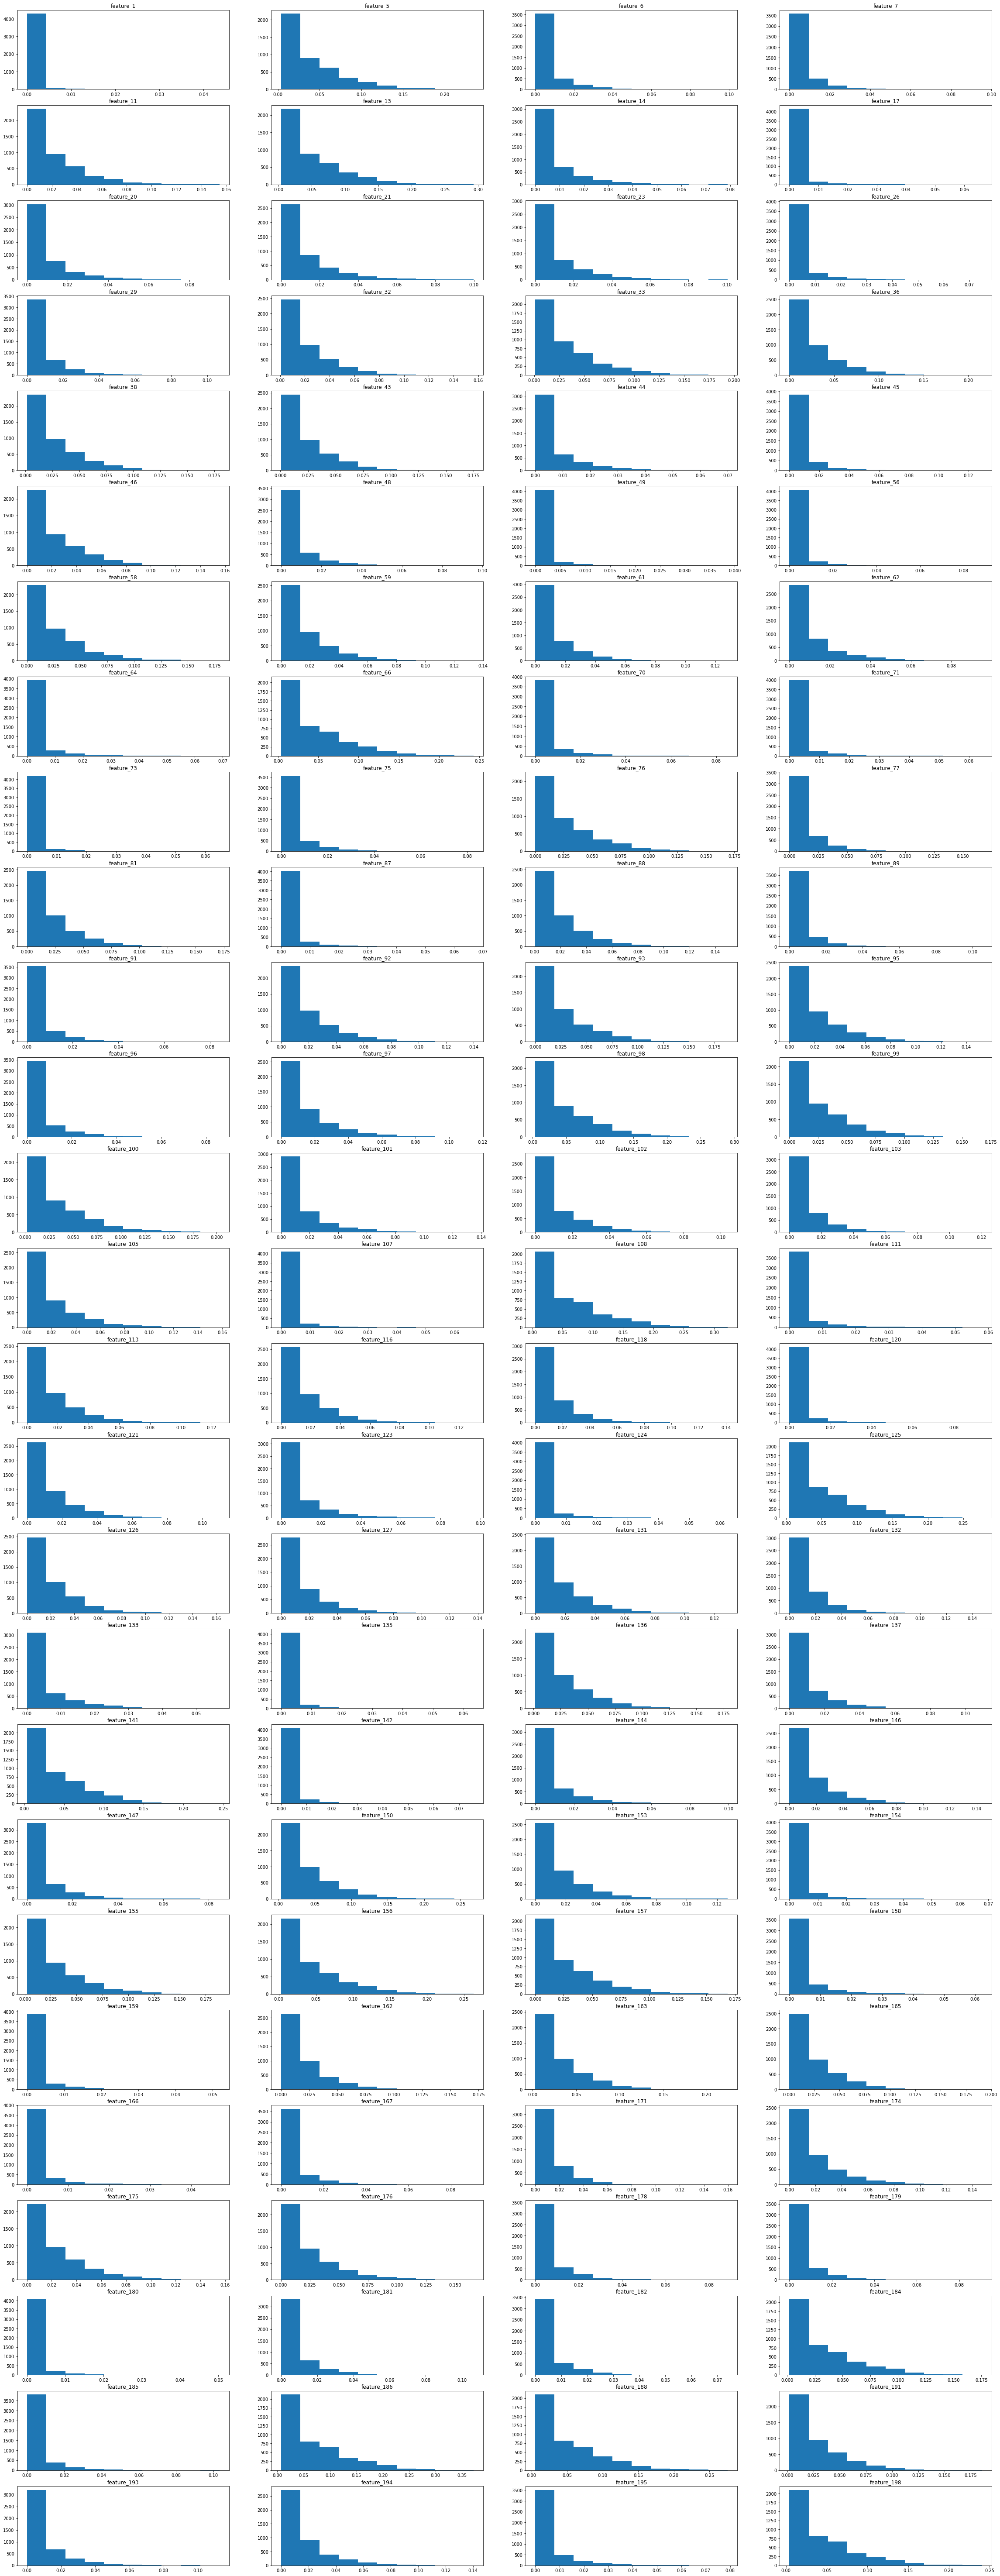

In [ ]:
print('Distributions of the  columns in  the train data')

plt.figure(figsize=(40, 200))
for i, col in enumerate(list(train_df1.columns)[2:]):
    plt.subplot(50,4,i+1 ,);
    plt.hist(train_df1[col])
    plt.title(col)

Distributions of the  columns in  the test data


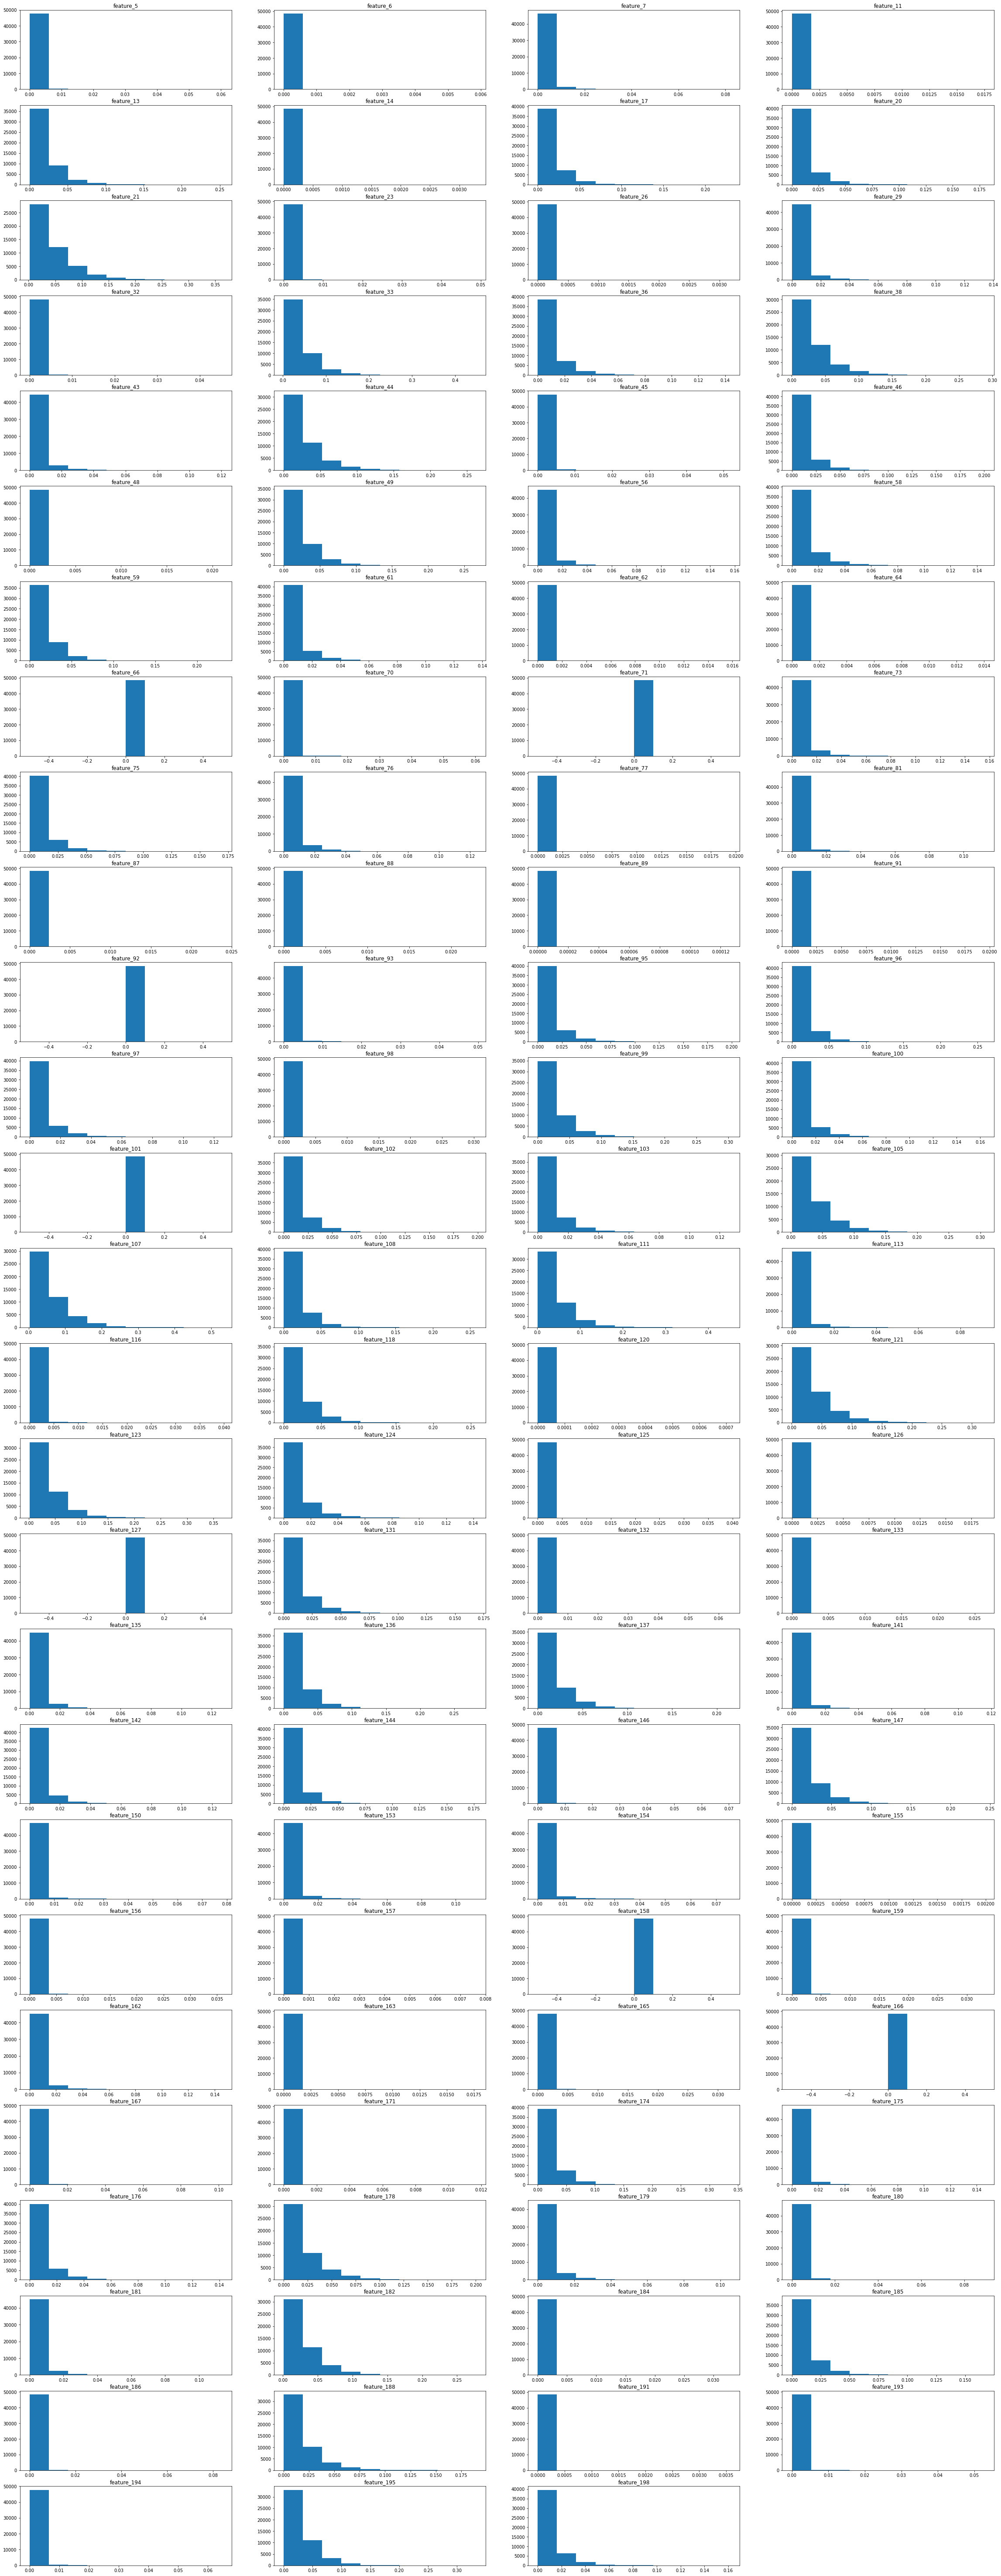

In [ ]:
print('Distributions of the  columns in  the test data')

plt.figure(figsize=(40, 200))
for i, col in enumerate(list(test_df1.columns)[2:]):
    plt.subplot(50,4,i+1 ,);
    plt.hist(test_df1[col])
    plt.title(col)

### Normalizing the Feature 

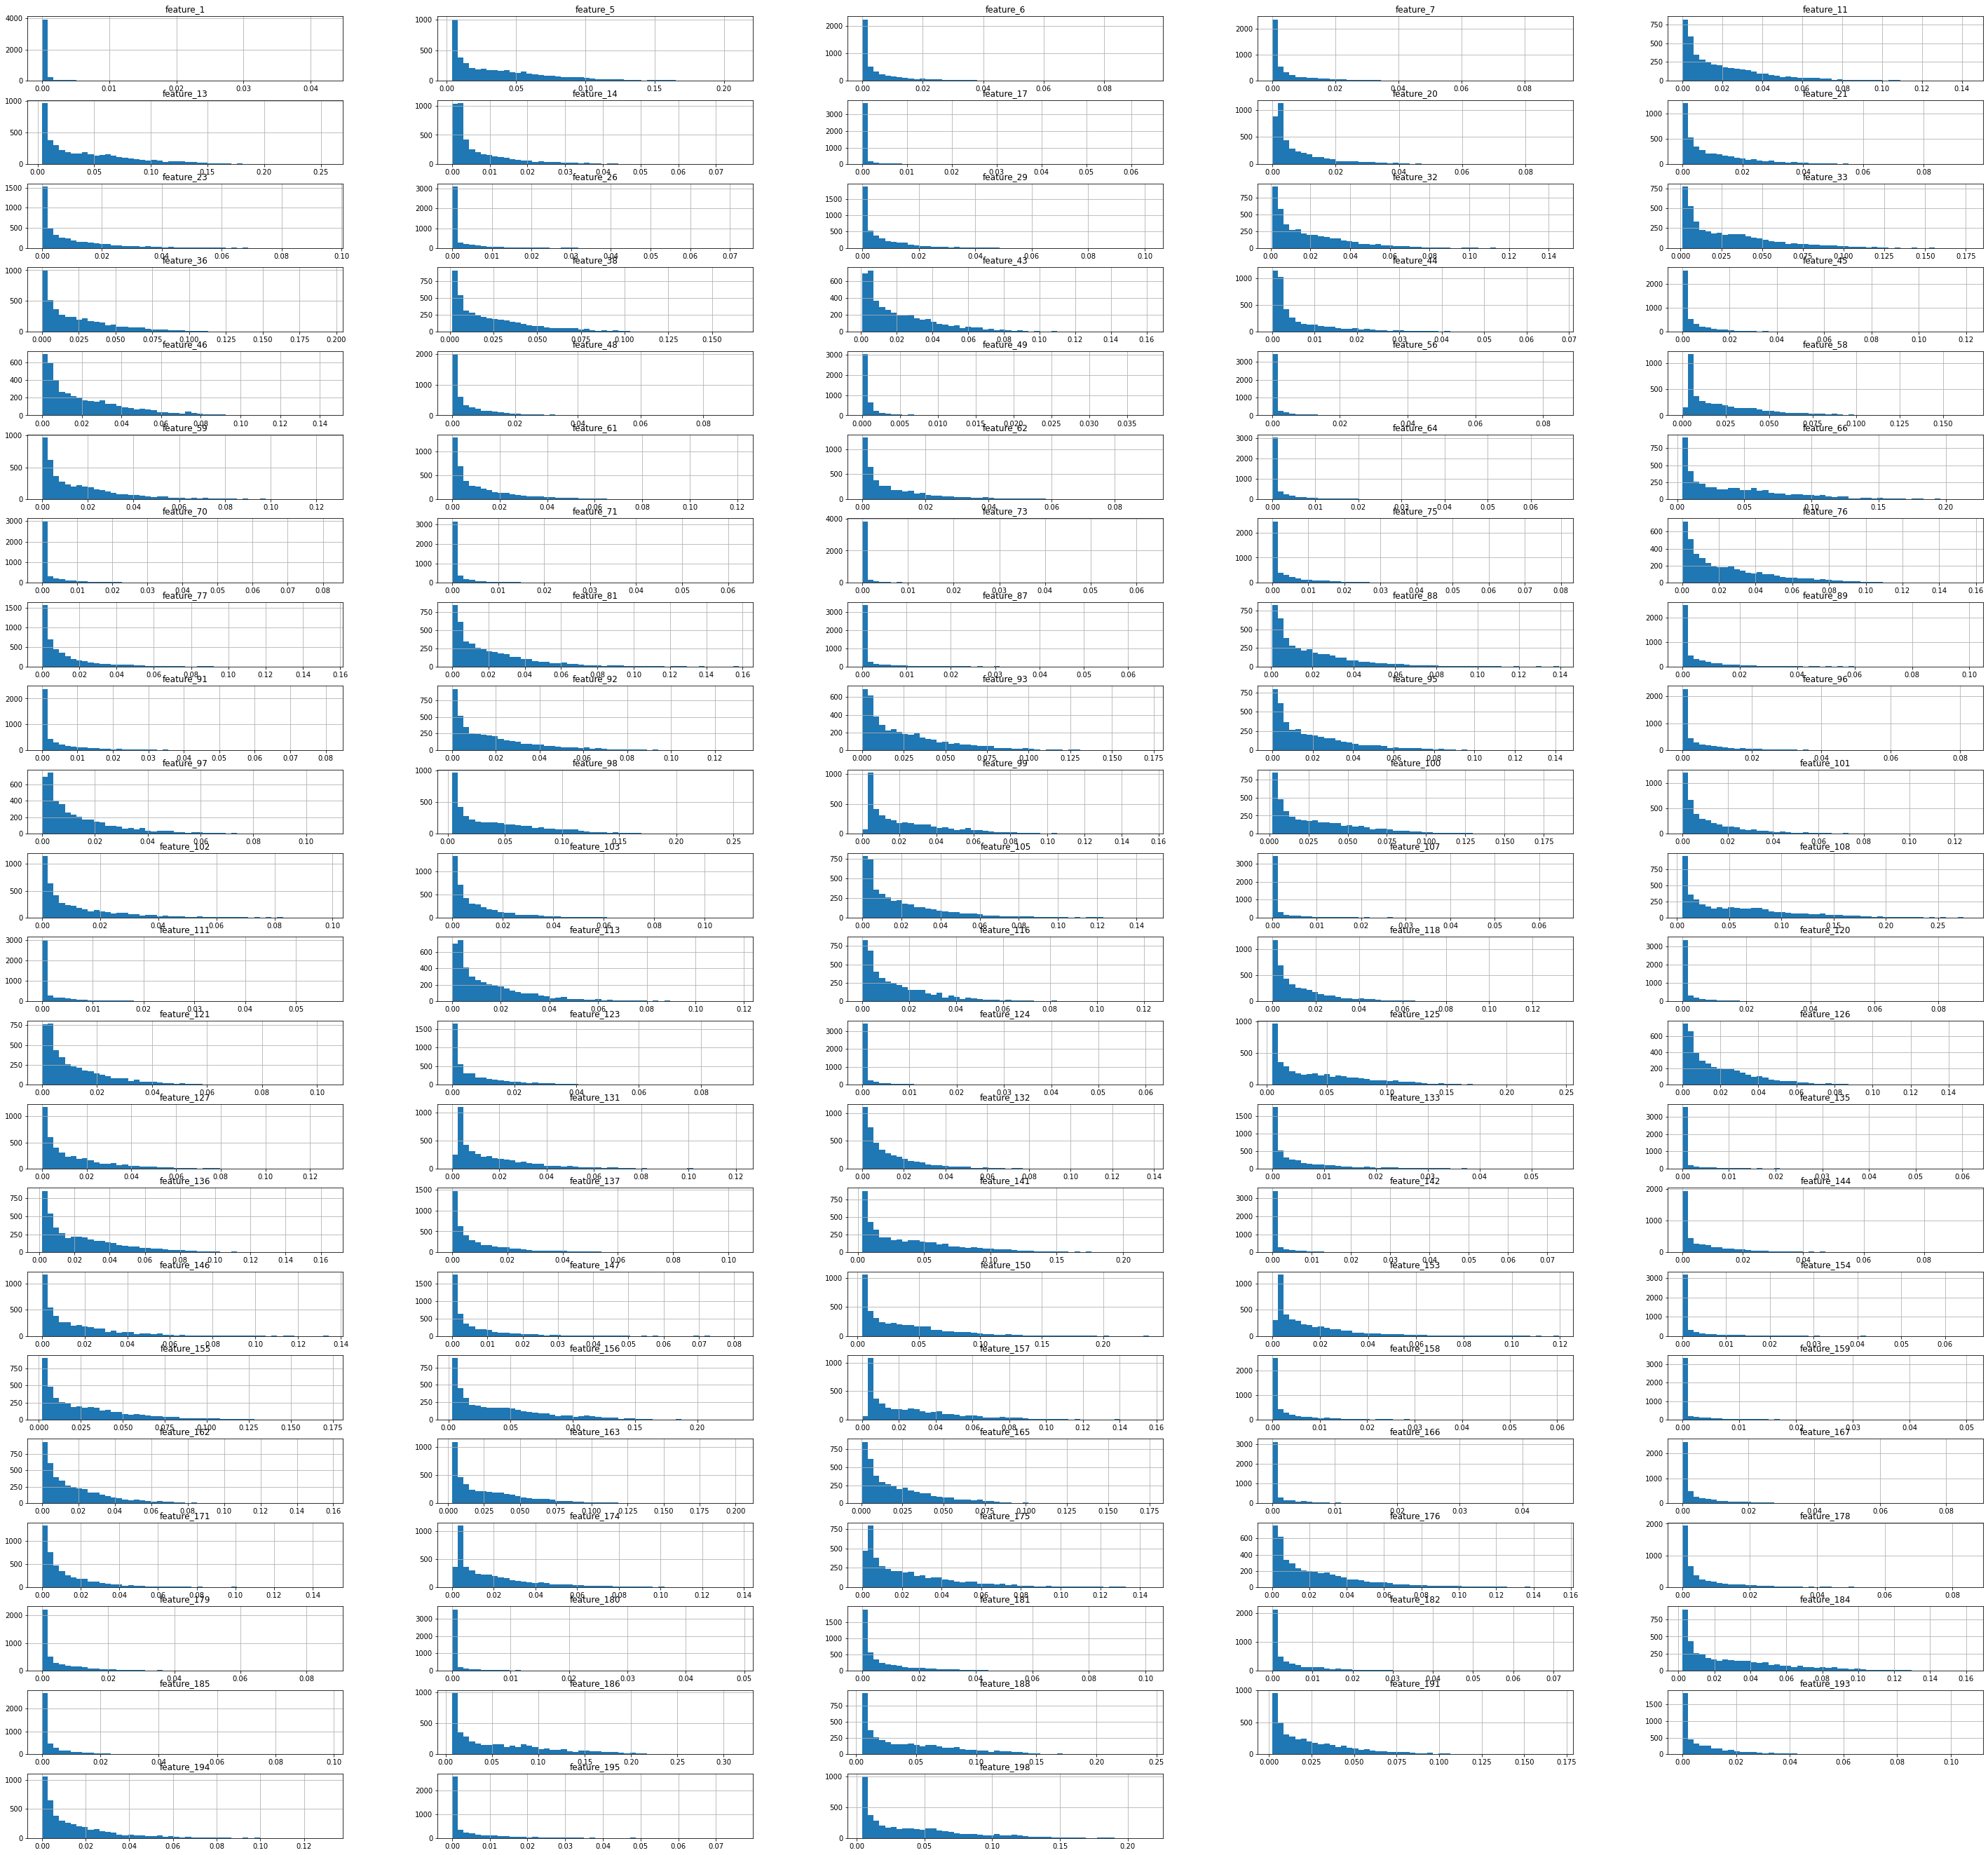

In [ ]:
# select the features
features = train_df1.columns[2:]

# log transform the features
train_df1[features] = np.log1p(train_df1[features])

#plot 
train_df1[features].hist(grid=True, bins=50, figsize=(50, 50), layout=(23,5))
plt.show()

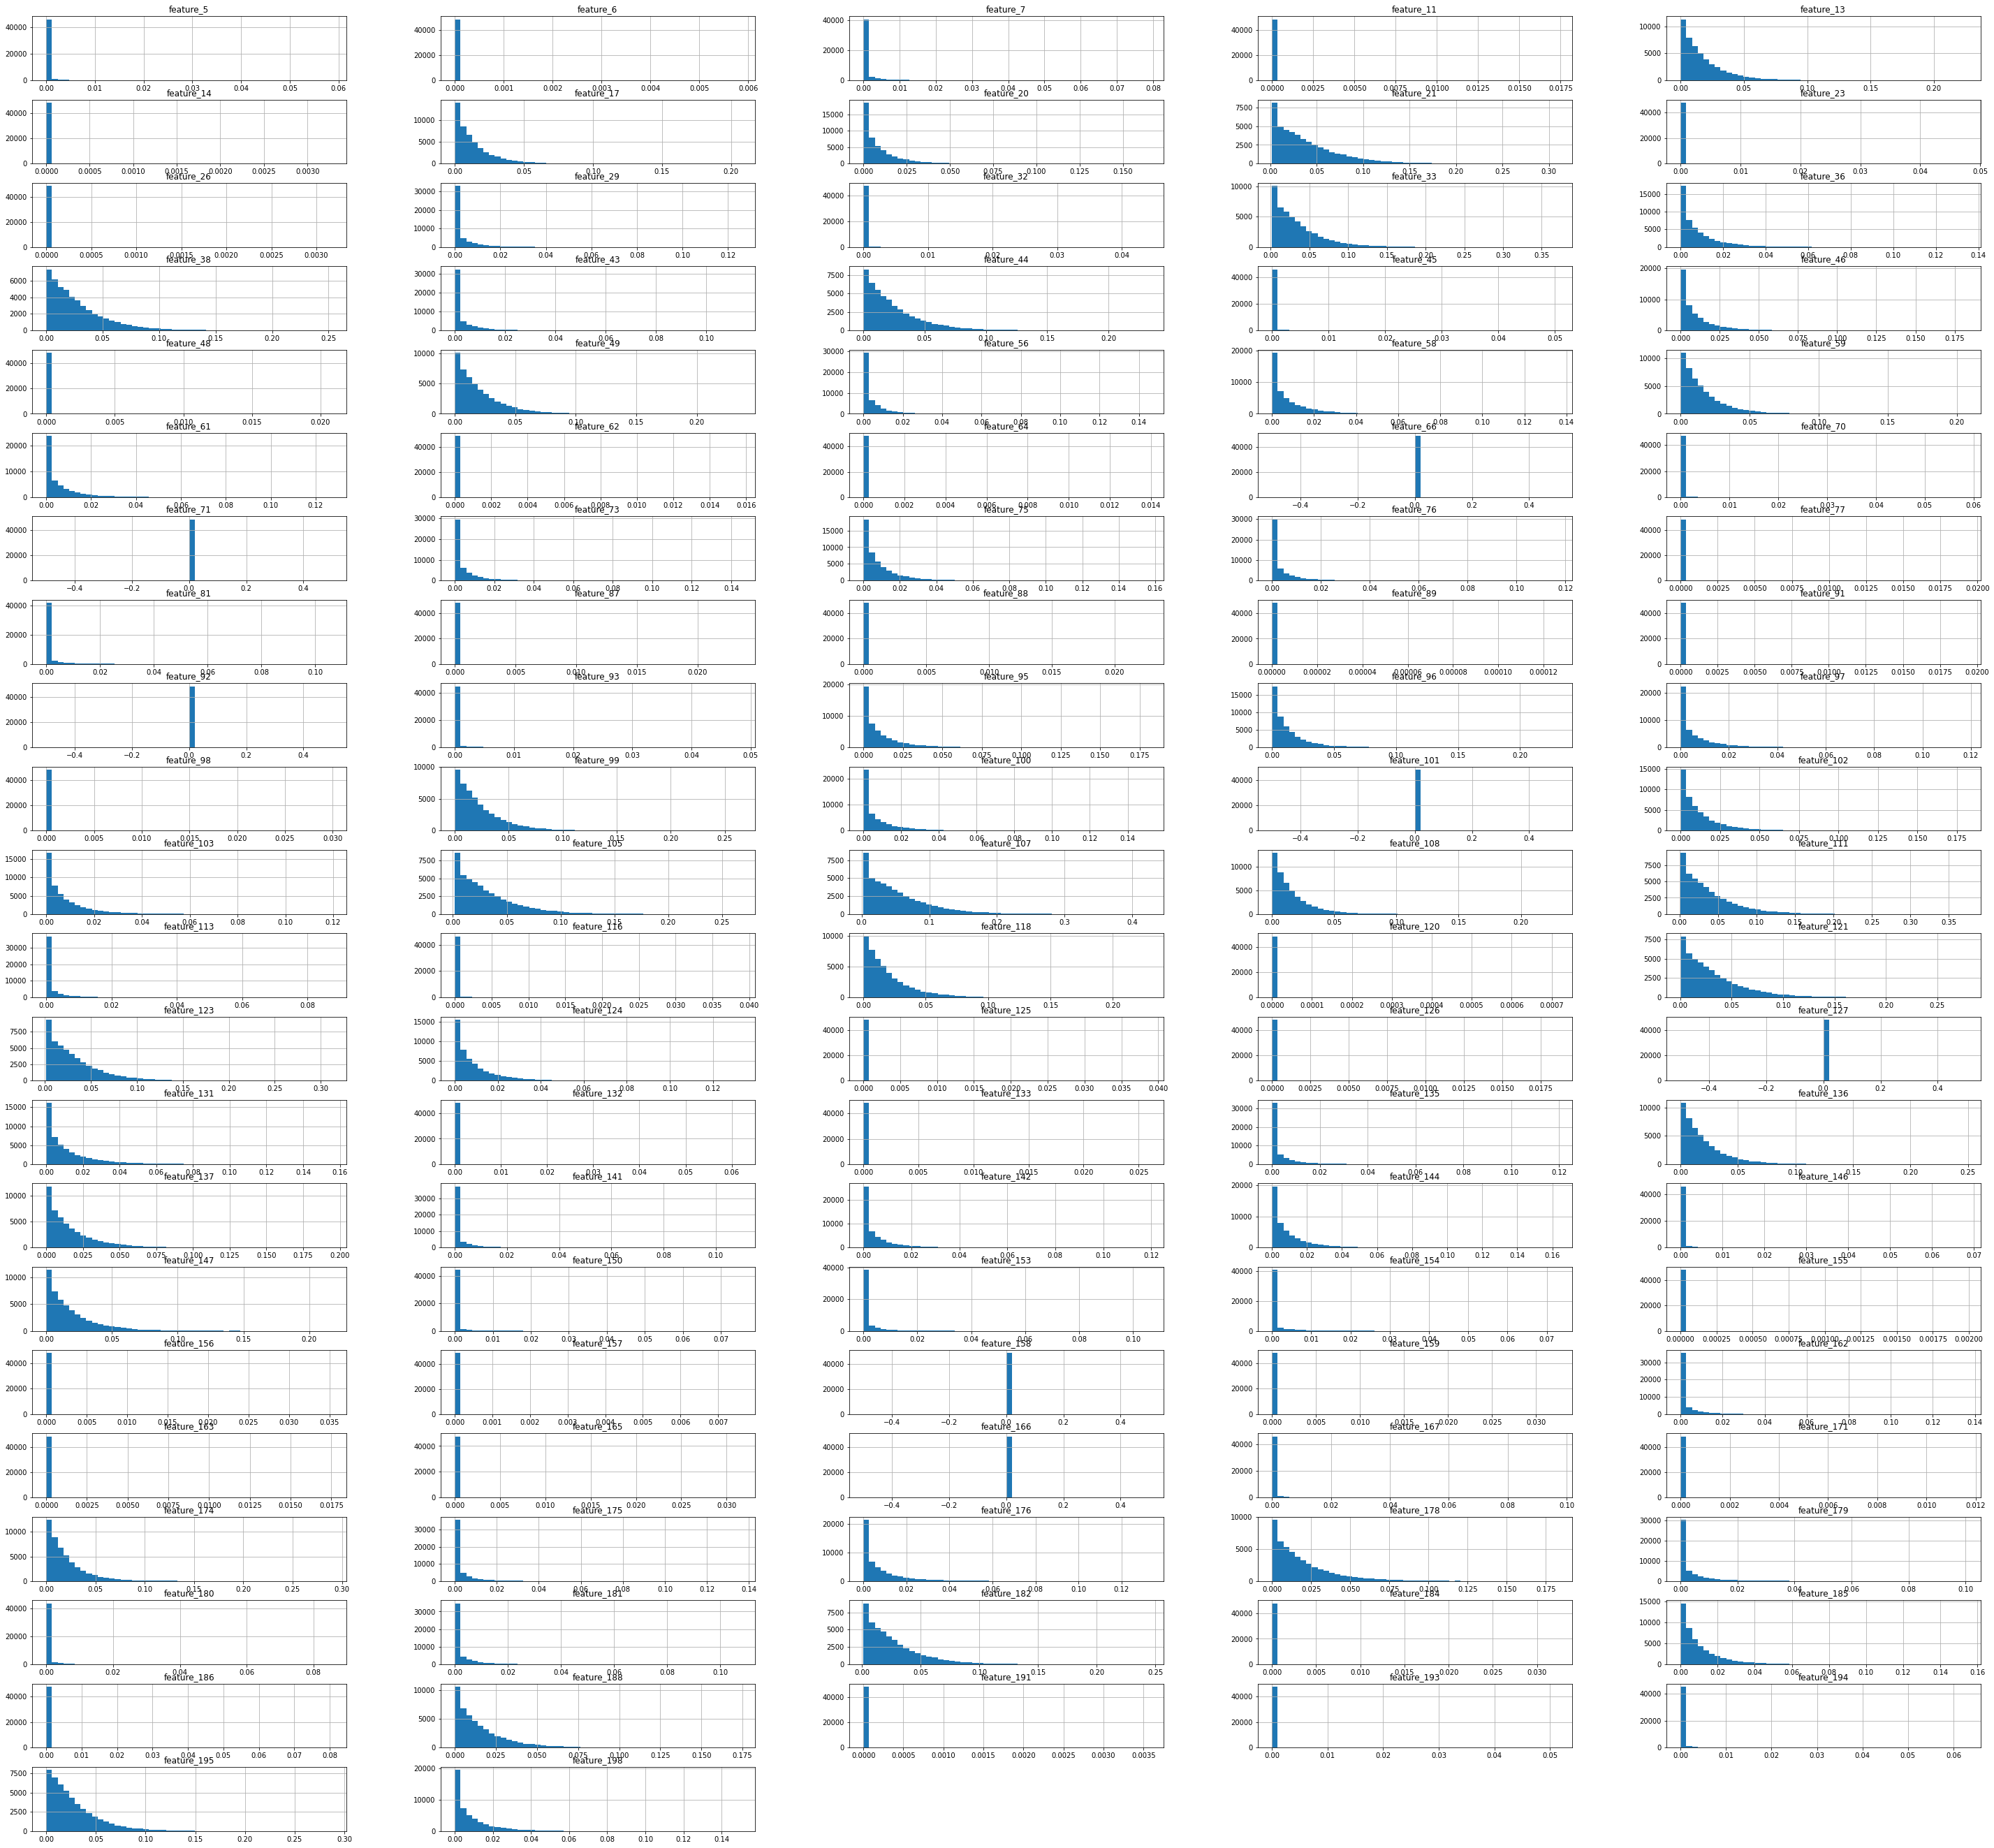

In [ ]:
# select the features
features = test_df1.columns[2:]

# log transform the features
test_df1[features] = np.log1p(test_df1[features])

#plot 
test_df1[features].hist(grid=True, bins=50, figsize=(50, 50), layout=(23,5))
plt.show()

### Target Variable distribution 

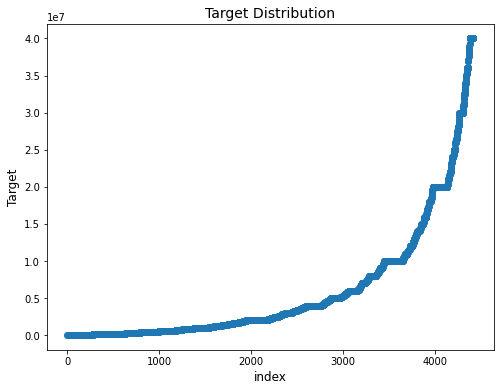

In [ ]:
#Let us first do a scatter plot of the target variable to see if there are any visible outliers.
plt.figure(figsize=(8,6))
plt.scatter(range(train_df1.shape[0]), np.sort(train_df1['target'].values))
plt.xlabel('index', fontsize=12)
plt.ylabel('Target', fontsize=12)
plt.title("Target Distribution", fontsize=14)
plt.show()

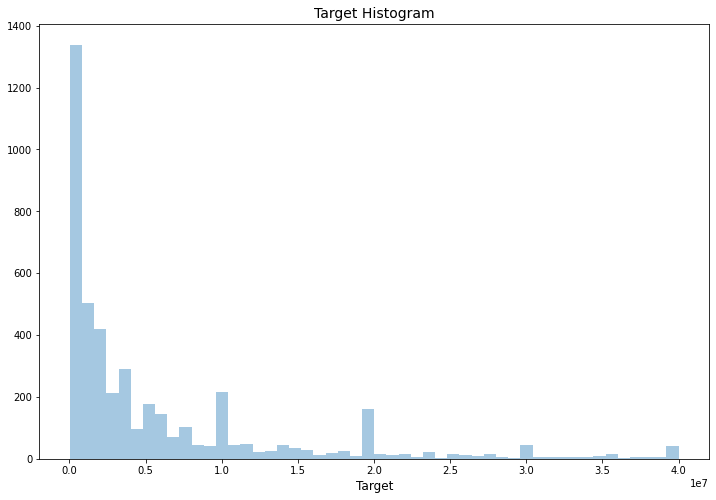

In [ ]:
#Target Histogram 
plt.figure(figsize=(12,8))
sns.distplot(train_df1["target"].values, bins=50, kde=False)
plt.xlabel('Target', fontsize=12)
plt.title("Target Histogram", fontsize=14)
plt.show()

**Observation**: The Target Column is right skewed so we need to normalize it 

### Normalizing the target Varible using Log Transformation

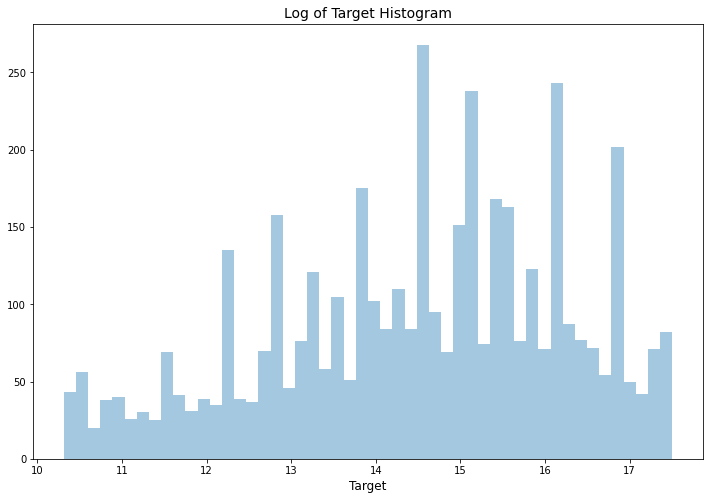

In [ ]:
#Target Variable Distribution After Normalization 
plt.figure(figsize=(12,8))
sns.distplot( np.log1p(train_df1["target"].values), bins=50, kde=False)
plt.xlabel('Target', fontsize=12)
plt.title("Log of Target Histogram", fontsize=14)
plt.show()

### Checking for Feature Importance using Correlation

In [ ]:
# Splitting the train dataset to prevent overfitting wehn checking for correlation

main_cols = train_df1.columns.difference(['ID', 'target'])
A = train_df1[main_cols]
B = train_df1.target

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(A,B,test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)

(3094, 108)
(1326, 108)


In [ ]:
train_df1.corr(method='pearson').style.background_gradient(cmap='rocket_r')

In [ ]:
def correlation(dataset, threshold):
    col_corr = set() # set of all correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
      for j in range(i):
        if (corr_matrix.iloc[i, j]) > threshold:
          colname = corr_matrix.columns[i]
          col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

33

In [ ]:
corr_features

{'feature_108',
 'feature_125',
 'feature_13',
 'feature_136',
 'feature_141',
 'feature_150',
 'feature_155',
 'feature_156',
 'feature_157',
 'feature_163',
 'feature_165',
 'feature_175',
 'feature_176',
 'feature_184',
 'feature_186',
 'feature_188',
 'feature_191',
 'feature_198',
 'feature_32',
 'feature_33',
 'feature_36',
 'feature_38',
 'feature_43',
 'feature_46',
 'feature_5',
 'feature_58',
 'feature_66',
 'feature_76',
 'feature_81',
 'feature_93',
 'feature_95',
 'feature_98',
 'feature_99'}

In [ ]:
print('Original Shape of Train Dataset {}'.format(train_df1.shape))

train_df1.drop(labels=corr_features, axis=1, inplace=True)

print('Shape after dropping Constant Columns from Train Dataset {}'.format(train_df1.shape))

Original Shape of Train Dataset (4420, 110)
Shape after dropping Constant Columns from Train Dataset (4420, 77)


In [ ]:
# Dropping the highly correlated features in the test dataset as well

print('Original Shape of Test Dataset {}'.format(test_df1.shape))

test_df1.drop(labels=corr_features, axis=1, inplace=True)

print('Shape after dropping Constant Columns from Train Dataset {}'.format(test_df1.shape))

Original Shape of Test Dataset (48443, 109)
Shape after dropping Constant Columns from Train Dataset (48443, 76)


## Exporting Our New Shiny Clean Datasets

In [ ]:
# We then extract the shiny clean processed datasets for modelling
train_df1.to_csv(r'clean_train.csv', index=False)
test_df1.to_csv(r'clean_test.csv', index=False)